<a href="https://colab.research.google.com/github/aaronkr-classroom/1-hello-python-md-2-juyungbae-spec/blob/main/huffman_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Huffman Coding Implementation

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import heapq
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("\n🔵 HUFFMAN CODING")
print("Adaptive coding - the practical application of information theory!")

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq


🔵 HUFFMAN CODING
Adaptive coding - the practical application of information theory!


In [3]:
def build_huffman_tree(text):
    """Build Huffman tree from text"""
    # Count frequencies
    freq_count = Counter(text)

    # Create priority queue (min-heap)
    heap = [Node(char, freq) for char, freq in freq_count.items()]
    heapq.heapify(heap)

    # Build tree
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right

        heapq.heappush(heap, merged)

    return heap[0] if heap else None

In [4]:
def generate_huffman_codes(root):
    """Generate Huffman codes from tree"""
    if not root:
        return {}

    codes = {}

    def generate_codes_helper(node, code):
        if node:
            if node.char is not None:  # Leaf node
                codes[node.char] = code if code else '0'  # Handle single character case
            else:
                generate_codes_helper(node.left, code + '0')
                generate_codes_helper(node.right, code + '1')

    generate_codes_helper(root, '')
    return codes

In [8]:
def huffman_encode(text, codes):
    """Encode text using Huffman codes"""
    return ''.join(codes[char] for char in text)

def calculate_compression_ratio(original_text, encoded_bits):
    """Calculate compression ratio"""
    original_bits = len(original_text) * 8  # 8 bits per character in ASCII
    compressed_bits = len(encoded_bits)
    return compressed_bits / original_bits

# Demonstrate Huffman coding
# short_text = "hello world! this is a test message for huffman coding."
short_text = """
༼ つ ◕_◕ ༽つ ╰(*°▽°*)╯  ¯\_(ツ)_/¯   ☜(ﾟヮﾟ☜)

👁‍🗨🍤

 I'm not wearing hockey pads. This isn't a car. I'll be standing where l belong. Between you and the peopIe of Gotham. I'm Batman My anger outweights my guilt. Bats frighten me. It's time my enemies shared my dread.

 Hero can be anyone. Even a man knowing something as simple and reassuring as putting a coat around a young boy shoulders to let him know the world hadn't ended.

 Bats frighten me. It's time my enemies shared my dread. Swear to me! Someone like you. Someone who'll rattle the cages. Hero can be anyone. Even a man knowing something as simple and reassuring as putting a coat around a young boy shoulders to let him know the world hadn't ended.

 Swear to me! I'm not wearing hockey pads. Bats frighten me. It's time my enemies shared my dread. Bats frighten me. It's time my enemies shared my dread. I can't do that as Bruce Wayne... as a man. I'm flesh and blood. I can be ignored, destroyed. But as a symbol, I can be incorruptible, I can be everlasting.

 I'm not wearing hockey pads. This isn't a car. I'll be standing where l belong. Between you and the peopIe of Gotham. I'm Batman My anger outweights my guilt. Bats frighten me. It's time my enemies shared my dread.
"""
print(f"📝 Original text: '{short_text}'")
print(f"📏 Length: {len(short_text)} characters")

# Build Huffman tree and generate codes
root = build_huffman_tree(short_text)
huffman_codes = generate_huffman_codes(root)

📝 Original text: '
༼ つ ◕_◕ ༽つ ╰(*°▽°*)╯  ¯\_(ツ)_/¯   ☜(ﾟヮﾟ☜)

👁‍🗨🍤

 I'm not wearing hockey pads. This isn't a car. I'll be standing where l belong. Between you and the peopIe of Gotham. I'm Batman My anger outweights my guilt. Bats frighten me. It's time my enemies shared my dread.

 Hero can be anyone. Even a man knowing something as simple and reassuring as putting a coat around a young boy shoulders to let him know the world hadn't ended.

 Bats frighten me. It's time my enemies shared my dread. Swear to me! Someone like you. Someone who'll rattle the cages. Hero can be anyone. Even a man knowing something as simple and reassuring as putting a coat around a young boy shoulders to let him know the world hadn't ended.

 Swear to me! I'm not wearing hockey pads. Bats frighten me. It's time my enemies shared my dread. Bats frighten me. It's time my enemies shared my dread. I can't do that as Bruce Wayne... as a man. I'm flesh and blood. I can be ignored, destroyed. But as a symbol, I c

In [15]:
# Show some codes
print("\n🔤 Huffman Codes (sample):")
sorted_codes = sorted(huffman_codes.items(), key=lambda x: len(x[1]))
for char, code in sorted_codes[:]:  # Show first 10
    char_display = char if char != ' ' else 'SPACE'
    print(f"   '{char_display}': {code}")

# Encode the text
encoded_text = huffman_encode(short_text, huffman_codes)
compression_ratio = calculate_compression_ratio(short_text, encoded_text)


🔤 Huffman Codes (sample):
   'e': 001
   'SPACE': 111
   'o': 0001
   't': 0110
   'n': 1000
   'a': 1010
   'l': 00000
   'y': 01000
   'g': 01001
   '.': 01110
   'h': 10010
   'd': 10110
   'r': 10111
   'i': 11000
   'm': 11010
   's': 11011
   'b': 000010
   'c': 010100
   'w': 011110
   ''': 011111
   'I': 100110
   'u': 100111
   'f': 0000111
   'k': 0101010
   'B': 1100100
   'p': 1100101
   '
': 1100111
   ')': 00001100
   'S': 01011011
   '¯': 000011010
   '!': 000011011
   'H': 010101100
   '°': 010101110
   '◕': 010101111
   'G': 010110100
   'E': 010110101
   'M': 010111000
   'T': 010111001
   'ﾟ': 010111010
   '☜': 010111011
   'つ': 010111100
   '*': 010111111
   'v': 110011000
   '(': 110011001
   ',': 110011010
   '_': 110011011
   '༼': 0101011010
   'ヮ': 0101011011
   '▽': 0101100000
   '🗨': 0101100001
   '╰': 0101100010
   '\': 0101100011
   'W': 0101100100
   '╯': 0101100101
   '༽': 0101100110
   '🍤': 0101100111
   '‍': 0101111010
   '👁': 0101111011
   '/': 0101111

In [16]:
print(f"\n📊 Compression Results:")
print(f"   • Original size: {len(short_text) * 8} bits ({len(short_text)} chars × 8 bits)")
print(f"   • Compressed size: {len(encoded_text)} bits")
print(f"   • Compression ratio: {compression_ratio:.3f}")
print(f"   • Space saved: {(1-compression_ratio)*100:.1f}%")


📊 Compression Results:
   • Original size: 9936 bits (1242 chars × 8 bits)
   • Compressed size: 5692 bits
   • Compression ratio: 0.573
   • Space saved: 42.7%


In [17]:
# Visualize code lengths
char_frequencies = Counter(short_text)
code_lengths = [(char, len(huffman_codes[char]), freq)
                for char, freq in char_frequencies.most_common()]

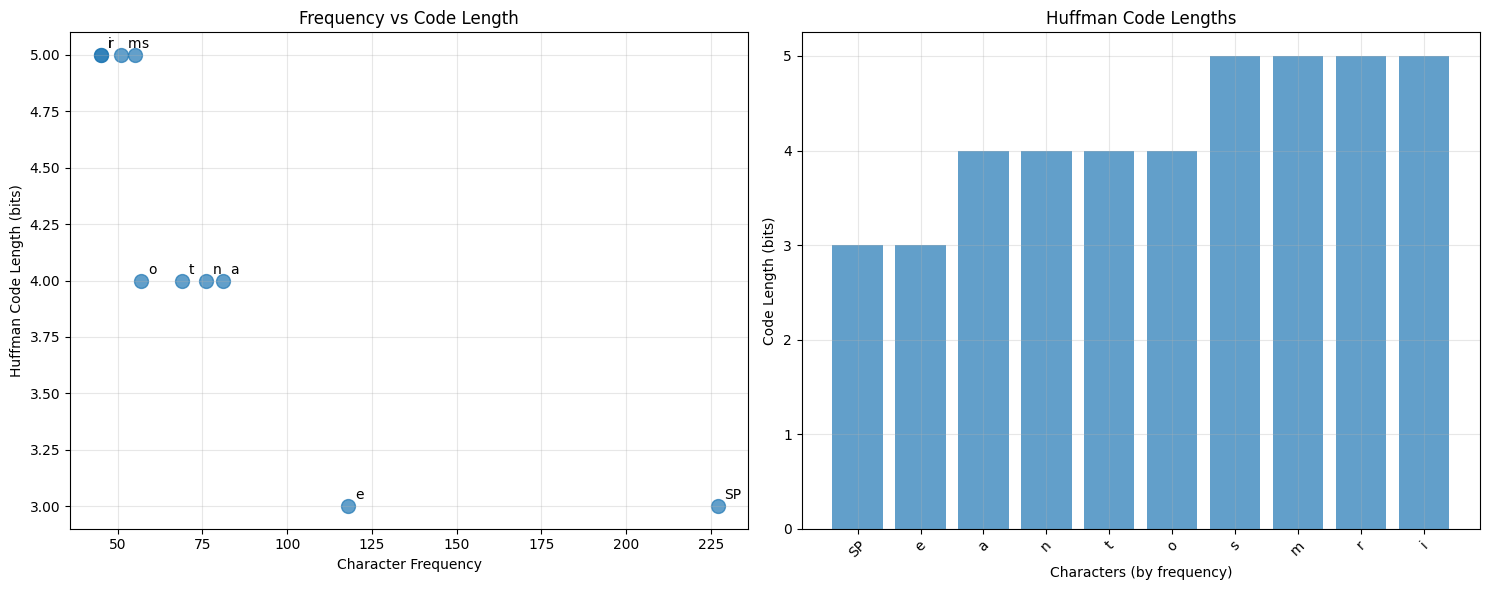

In [18]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Frequency vs Code Length
chars = [c if c != ' ' else 'SP' for c, _, _ in code_lengths[:10]]
frequencies = [f for _, _, f in code_lengths[:10]]
lengths = [l for _, l, _ in code_lengths[:10]]

ax1.scatter(frequencies, lengths, s=100, alpha=0.7)
for i, char in enumerate(chars):
    ax1.annotate(char, (frequencies[i], lengths[i]),
                xytext=(5, 5), textcoords='offset points')
ax1.set_xlabel('Character Frequency')
ax1.set_ylabel('Huffman Code Length (bits)')
ax1.set_title('Frequency vs Code Length')
ax1.grid(True, alpha=0.3)

# Code length distribution
ax2.bar(range(len(chars)), lengths, alpha=0.7)
ax2.set_xlabel('Characters (by frequency)')
ax2.set_ylabel('Code Length (bits)')
ax2.set_title('Huffman Code Lengths')
ax2.set_xticks(range(len(chars)))
ax2.set_xticklabels(chars, rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
print("\n🎓 Huffman Coding Insights:")
print("   • Frequent characters get shorter codes")
print("   • Rare characters get longer codes")
print("   • This minimizes total message length")
print("   • Optimal prefix-free coding algorithm")


🎓 Huffman Coding Insights:
   • Frequent characters get shorter codes
   • Rare characters get longer codes
   • This minimizes total message length
   • Optimal prefix-free coding algorithm
